<h1 align="center"> Visualizing CNN and Neural Style Transfer </h1>

**This tutorial will discover:
<br> - Some techniques these are popularly used to visualize what's going on inside CNN. 
<br> - Then, leveraging on the intuition about CNN, we will experiment on a Neural style transfer example and overview the current progress towards NST.**

---

# 1 - How convolutional neural network see the world?

[*** Firstly, let's fire visual perceptrons with 3D-interaction simple Convolutional network ***](https://youtu.be/3JQ3hYko51Y?t=85s)


<p align="center">
<img src="images/mnist.png" style="width:400px;height:400px;"> </p>

But it turns out there are something that don't satify us and then leave us with some crucial questions:
- <i> To discuss in more detail, what's going on into each perceptron/neuron?
- Do deeper feature maps capture meaningful features to make decision about class object?
- How rich information deep representations retain in CNN? 



## 1.1 - Maximally Activating Patches
<img src="images/max_activating1.png" style="width:750px;height:300px;"> 
<caption><center> <u> <font color='purple'> **Figure 1** </u><font color='purple'>  : **Pick a layer and a channel in CNN** </center></caption>
- Pick a layer and a channel; e.g. conv5 is 128 x 13 x 13, pick channel 17/128
- Run many images through the network, record values of chosen channel
- Visualize image patches that correspond to maximal activations
    

<img src="images/max_activating2.png" style="width:500px;height:800px;">
<caption><center> <u> <font color='purple'> **Figure 2** </u><font color='purple'>  : **Piece of images that fire activating neuron with maximal value** </center></caption>

## 1.2 - Saliency vs Occlusion
In this technique, we mask part of the image before feeding into CNN, check out the final result class score.
<img src="images/Occlusion1.png" style="width:900px;height:400px;"> 
<caption><center> <u> <font color='purple'> **Figure 3** </u><font color='purple'>  : **Mask out part of the image and feed into CNN** </center></caption>
<br><br><br>
<img src="images/Occlusion2.png" style="width:450px;height:600px;"> 
<caption><center> <u> <font color='purple'> **Figure 4** </u><font color='purple'>  : **Salient pixels image ** </center></caption>

## 1.3 -  Saliency Maps
Instead of using feed-forward fashion, we can produce a Saliency map of an specified image via Backprob. 
<img src="images/saliency1.png" style="width:900px;height:300px;"> 
<caption><center> <u> <font color='purple'> **Figure 5** </u><font color='purple'>  : **Salient map via backprob** </center></caption> <br><br><br>
To generate this map, we compute gradient of class score with respect to each image pixels and take the max and absolute value from RBG channels.

<img src="images/saliency2.png" style="width:900px;height:400px;"> 
<caption><center> <u> <font color='purple'> **Figure 6** </u><font color='purple'>  : **More salient maps** </center></caption><br><br><br>
Gradient-based visualisation can be applied to the visualisation of activities in any layer, not just a convolutional one and class score.
<img src="images/saliency3.png" style="width:900px;height:330px;"> 
<caption><center> <u> <font color='purple'> **Figure 7** </u><font color='purple'>  : **Intermediate features via (guided) backprop** </center></caption>

## 1.4 -  Inverting feature vector
Given a CNN feature vector for an image, find a new image that:
- Matches the given feature vector
- “looks natural” (image prior regularization)
<img src="images/inverted1.png" style="width:900px;height:330px;"> 
<caption><center> <u> <font color='purple'> **Figure 8** </u><font color='purple'>  : Generate image with regard to loss of feature vector </center></caption> <br><br><br>
<img src="images/inverted2.png" style="width:900px;height:550px;"> 
<caption><center> <u> <font color='purple'> **Figure 9** </u><font color='purple'>  : Reconstruct from different layers of AlexNet </center></caption>

# 2 - Neural Style Transfer
Here are few other examples:

<img src="images/perspolis_vangogh.png" style="width:750px;height:300px;">
<caption><center> <u> <font color='purple'> **Figure 10** </u><font color='purple'>  : ** The beautiful ruins of the ancient city of Persepolis (Iran) with the style of Van Gogh (The Starry Night) ** </center></caption> <br>
    
<img src="images/pasargad_kashi.png" style="width:750px;height:300px;">
<caption><center> <u> <font color='purple'> **Figure 11** </u><font color='purple'>  : ** The tomb of Cyrus the great in Pasargadae with the style of a Ceramic Kashi from Ispahan ** </center></caption> <br>

<img src="images/circle_abstract.png" style="width:750px;height:300px;">
<caption><center> <u> <font color='purple'> **Figure 12** </u><font color='purple'>  : ** A scientific study of a turbulent fluid with the style of a abstract blue fluid painting ** </center></caption>


## 2.1 - How do you ensure the generated image G matches the content of the image C?

The earlier (shallower) layers of a ConvNet tend to detect lower-level features such as edges and simple textures, and the later (deeper) layers tend to detect higher-level features such as more complex textures as well as object classes. 

We would like the "generated" image G to have similar content as the input image C. Suppose you have chosen some layer's activations to represent the content of an image. In practice, you'll get the most visually pleasing results if you choose a layer in the middle of the network--neither too shallow nor too deep. (After you have finished this exercise, feel free to come back and experiment with using different layers, to see how the results vary.)

So, suppose you have picked one particular hidden layer to use. Now, set the image C as the input to the pretrained VGG network, and run forward propagation. Let $a^{(C)}$ be the hidden layer activations in the layer you had chosen. (This will be a $n_H \times n_W \times n_C$ tensor. Repeat this process with the image G: Set G as the input, and run forward progation. Let $$a^{(G)}$$ be the corresponding hidden layer activation. We will define as the content cost function as:

$$J_{content}(C,G) =  \frac{1}{4 \times n_H \times n_W \times n_C}\sum _{ \text{all entries}} (a^{(C)} - a^{(G)})^2\tag{1} $$

Here, $n_H, n_W$ and $n_C$ are the height, width and number of channels of the hidden layer you have chosen, and appear in a normalization term in the cost. For clarity, note that $a^{(C)}$ and $a^{(G)}$ are the volumes corresponding to a hidden layer's activations. In order to compute the cost $J_{content}(C,G)$, it might also be convenient to unroll these 3D volumes into a 2D matrix, as shown below. (Technically this unrolling step isn't needed to compute $J_{content}$, but it will be good practice for when you do need to carry out a similar operation later for computing the style const $J_{style}$.)

<img src="images/NST_LOSS.png" style="width:800px;height:400px;">
<caption><center> <u> <font color='purple'> **Figure 13** </u><font color='purple'>  : ** Unrolling the feature map in to 2D matrix ** </center></caption>


**Import library**

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.layers import AveragePooling2D, MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from io import BytesIO
import scipy.misc
from IPython.display import clear_output, Image, display, HTML
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_l_bfgs_b
from datetime import datetime
import PIL.Image

/home/vietai/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


**Model define** 

We use VGG16 model for this task, but get rid of the maxpool which throws away information and replace it with average pooling. 


<i>"Neural style transfer has a mystery:  despite its remarkable success, almost all style transfer is done with variants of the **VGG architecture**. This isn’t because no one is interested in doing style transfer on other architectures, but because attempts to do it on other architectures consistently work poorly."</i>
[[1]](https://distill.pub/2018/differentiable-parameterizations/#section-styletransfer)

In [2]:
def VGG16_AvgPool(shape):
    vgg = VGG16(input_shape=shape, weights='imagenet', include_top=False)
    new_model = Sequential()
    for layer in vgg.layers:
        if layer.__class__ == MaxPooling2D:
            new_model.add(AveragePooling2D())
        else:
            new_model.add(layer)
    return new_model

def VGG16_AvgPool_CutOff(shape, num_convs):
  # there are 13 convolutions in total we can pick any of them as the "output" of our content model
    if num_convs < 1 or num_convs > 13:
        print("num_convs must be in the range [1, 13]")
        return None
    model = VGG16_AvgPool(shape)
    new_model = Sequential() 
    n = 0
    for layer in model.layers:
        if layer.__class__ == Conv2D:
            n += 1
        new_model.add(layer)
        if n >= num_convs:
            break
    return new_model

**Utility function**

In [3]:
def unpreprocess(img):
    img[..., 0] += 103.939
    img[..., 1] += 116.779
    img[..., 2] += 126.68

    img = img[..., ::-1]
    return img

def scale_img(x):
    x = x - x.min()
    x = x / x.max()
    return x

def show_img(img,content):
    plt.imshow(img)
    plt.title(content)
    plt.show()
    
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 1)*255)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    
def load_and_preprocess(path, shape, title = "Input"):
    # loading img
    img = image.load_img(path, target_size=shape)

    #show_img(img,title)

    # convert image to array and preprocess for vgg
    x = image.img_to_array(img)
    showarray(x/225.0)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def content_model_to_grad(model,x):
    # make the target
    target = K.variable(model.predict(x))

    # define our loss 
    loss = K.mean(K.square(target - model.output))
    # gradients which are needed by the optimizer
    grads = K.gradients(loss, model.input)
    get_loss_and_grads = K.function(inputs=[model.input],outputs=[loss] + grads)
    return get_loss_and_grads

def content_model_to_grad_interpolate(model,x,y):
    # make the target
    target = K.variable(model.predict(x))
    target2 = K.variable(model.predict(y))
    # define our loss 
    loss = K.mean(K.square(target - model.output)) + K.mean(K.square(target2 - model.output))
    # gradients which are needed by the optimizer
    grads = K.gradients(loss, model.input)
    get_loss_and_grads = K.function(inputs=[model.input],outputs=[loss] + grads)
    return get_loss_and_grads

def get_loss_and_grads_wrapper(x_vec):
    # Scipy's minimizer allows us to pass back function value f(x) and its gradient f'(x) simultaneously,
    # we cannot use get_loss_and_grads() directly.
    # Input to minimizer func must be a 1-D array input to get_loss_and_grads must be [batch_of_images]
    # Gradient must also be a 1-D array and both loss and gradient must be np.float64 will get an error otherwise    
    l, g = get_loss_and_grads([x_vec.reshape(batch_shape)])
    return l.astype(np.float64), g.flatten().astype(np.float64)

# let's generalize this and put it into a function
def minimize(fn, epochs, batch_shape, show_noise = False):
    t0 = datetime.now()
    losses = []
    x = np.random.randn(np.prod(batch_shape))
    if show_noise:
        show_img(x.reshape(batch_shape[1:]),"Random noise image")
    for i in range(epochs):
        x, l, _ = fmin_l_bfgs_b(func=fn,
                                x0=x,
                                maxfun=20)
        x = np.clip(x, -127, 127)
        print("iter=%s, loss=%s" % (i, l))
        losses.append(l)

    print("duration:", datetime.now() - t0)
    plt.plot(losses)
    plt.show()

    newimg = x.reshape(batch_shape)
    final_img = unpreprocess(newimg)
    return final_img[0]

**Reconstruct image by inverting feature vector**

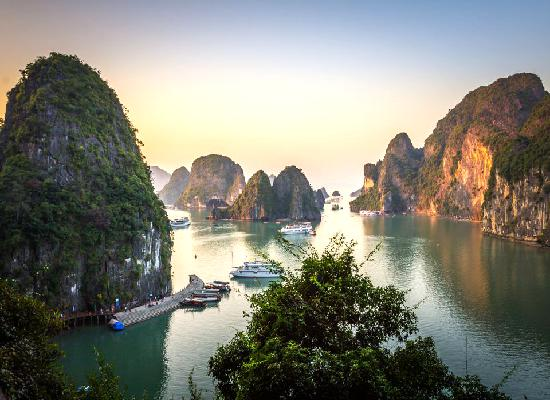

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


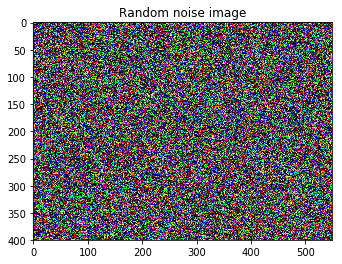

iter=0, loss=163.19308471679688
iter=1, loss=93.4476547241211
iter=2, loss=65.63128662109375
iter=3, loss=51.05540466308594
iter=4, loss=41.67655944824219
iter=5, loss=35.752540588378906
iter=6, loss=31.67847442626953
iter=7, loss=28.58331871032715
iter=8, loss=26.168649673461914
iter=9, loss=24.260757446289062
iter=10, loss=22.637348175048828
iter=11, loss=21.48423957824707
iter=12, loss=20.437789916992188
iter=13, loss=19.578125
iter=14, loss=18.751859664916992
iter=15, loss=18.12259292602539
iter=16, loss=17.3839111328125
iter=17, loss=16.767221450805664
iter=18, loss=16.28834342956543
iter=19, loss=15.796852111816406
duration: 0:00:29.130782


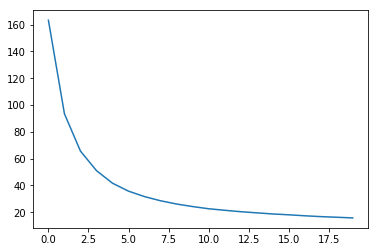

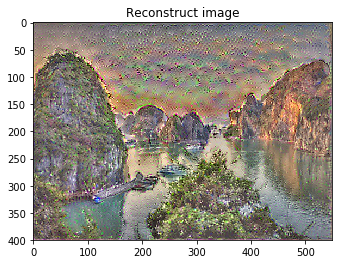

In [4]:
# open an image and configure, feel free to try your own
path_content = 'content/halongbay.jpg'
_target_size = (400,550)
epochs_num = 20

content_img = load_and_preprocess(path_content, _target_size,"Content image")
batch_shape = content_img.shape

# make a content model
# try different cutoffs to see the images that result
num_layer_cutoff = 10
content_model = VGG16_AvgPool_CutOff(content_img.shape[1:], num_layer_cutoff)

# define loss and grads
get_loss_and_grads = content_model_to_grad(content_model,content_img)
# let's optimize
final_img = minimize(get_loss_and_grads_wrapper, epochs_num, batch_shape, True)

# see the reconstruct image
show_img(scale_img(final_img),"Reconstruct image")

**Change the layer**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


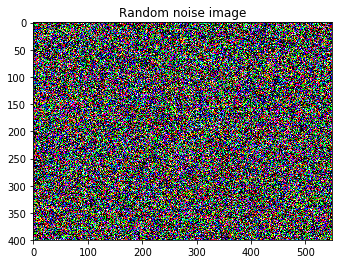

iter=0, loss=6.1296844482421875
iter=1, loss=2.5552639961242676
iter=2, loss=2.010359287261963
iter=3, loss=2.002283811569214
iter=4, loss=2.0023348331451416
iter=5, loss=2.0023348331451416
iter=6, loss=2.0023348331451416
iter=7, loss=2.0023348331451416
iter=8, loss=2.0023348331451416
iter=9, loss=2.0023348331451416
iter=10, loss=2.0023348331451416
iter=11, loss=2.0023348331451416
iter=12, loss=2.0023348331451416
iter=13, loss=2.0023348331451416
iter=14, loss=2.0023348331451416
iter=15, loss=2.0023348331451416
iter=16, loss=2.0023348331451416
iter=17, loss=2.0023348331451416
iter=18, loss=2.0023348331451416
iter=19, loss=2.0023348331451416
iter=20, loss=2.0023348331451416
iter=21, loss=2.0023348331451416
iter=22, loss=2.0023348331451416
iter=23, loss=2.0023348331451416
iter=24, loss=2.0023348331451416
iter=25, loss=2.0023348331451416
iter=26, loss=2.0023348331451416
iter=27, loss=2.0023348331451416
iter=28, loss=2.0023348331451416
iter=29, loss=2.0023348331451416
duration: 0:00:10.4346

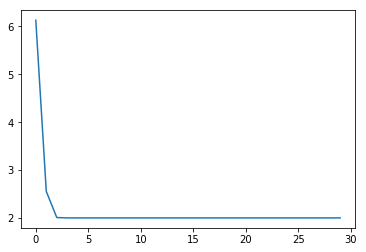

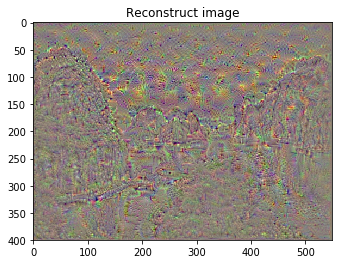

In [5]:
num_layer_cutoff = 12
content_model = VGG16_AvgPool_CutOff(content_img.shape[1:], num_layer_cutoff)

# define loss and grads
get_loss_and_grads = content_model_to_grad(content_model,content_img)
# let's optimize
final_img = minimize(get_loss_and_grads_wrapper, 30, batch_shape, True)

# see the reconstruct image
show_img(scale_img(final_img),"Reconstruct image")

**Reconstruct from layer 12**

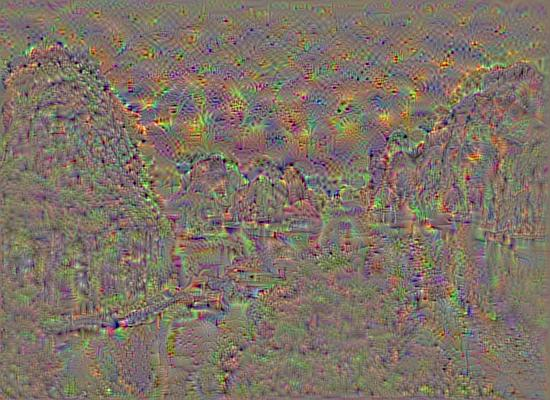

In [6]:
showarray(final_img/255.0)

**Interpolation** (greatwall.jpg & halongbay.jpg)

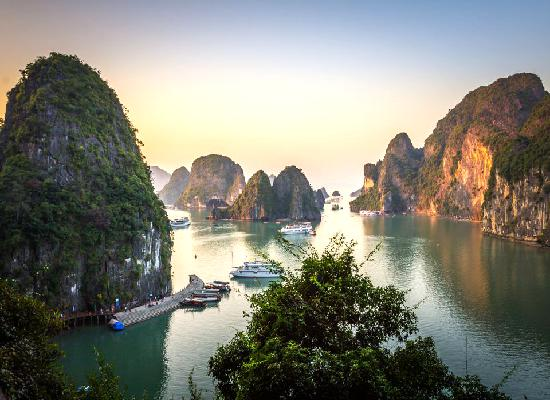

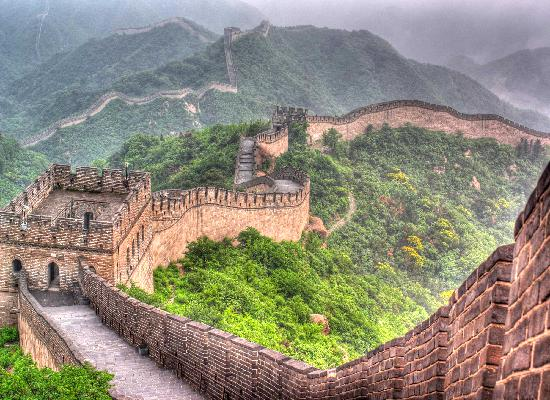

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


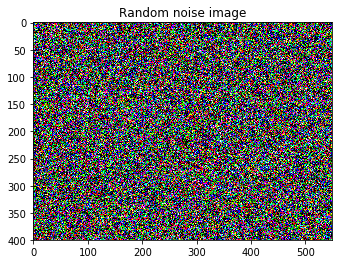

iter=0, loss=639.2476196289062
iter=1, loss=582.0927734375
iter=2, loss=559.8281860351562
iter=3, loss=549.1114501953125
iter=4, loss=542.6729736328125
iter=5, loss=538.283203125
iter=6, loss=535.130126953125
iter=7, loss=532.684326171875
iter=8, loss=530.8365478515625
iter=9, loss=529.3961181640625
iter=10, loss=528.2290649414062
iter=11, loss=527.2188110351562
iter=12, loss=526.3533325195312
iter=13, loss=525.6154174804688
iter=14, loss=524.968994140625
iter=15, loss=524.375
iter=16, loss=523.8435668945312
iter=17, loss=523.3665161132812
iter=18, loss=522.9338989257812
iter=19, loss=522.5541381835938
duration: 0:00:30.079643


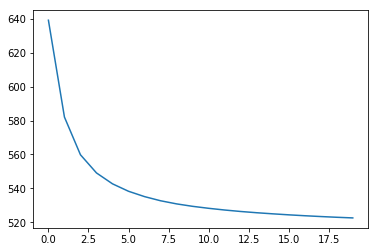

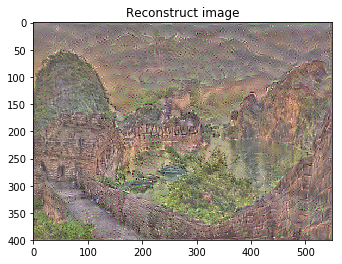

In [4]:
path_content = 'content/halongbay.jpg'
path_content2 = 'content/greatwall.jpg'
_target_size = (400,550)
epochs_num = 20

content_img = load_and_preprocess(path_content, _target_size,"Content image")
content_img2 = load_and_preprocess(path_content2, _target_size,"Content image")
batch_shape = content_img.shape

# make a content model
# try different cutoffs to see the images that result
num_layer_cutoff = 10
content_model = VGG16_AvgPool_CutOff(content_img.shape[1:], num_layer_cutoff)

# define loss and grads
get_loss_and_grads = content_model_to_grad_(content_model,content_img,content_img2)
# let's optimize
final_img = minimize(get_loss_and_grads_wrapper, epochs_num, batch_shape, True)

# see the reconstruct image
show_img(scale_img(final_img),"Reconstruct image")

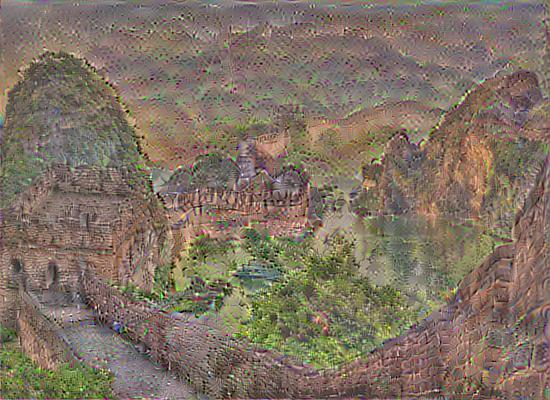

In [19]:
showarray(final_img/255.0)

## 2.2 - Style matrix

The style matrix is also called a "Gram matrix." In linear algebra, the Gram matrix G of a set of vectors $(v_{1},\dots ,v_{n})$ is the matrix of dot products, whose entries are ${\displaystyle G_{ij} = v_{i}^T v_{j} = np.dot(v_{i}, v_{j})  }$. In other words, $G_{ij}$ compares how similar $v_i$ is to $v_j$: If they are highly similar, you would expect them to have a large dot product, and thus for $G_{ij}$ to be large. 

Note that there is an unfortunate collision in the variable names used here. We are following common terminology used in the literature, but $G$ is used to denote the Style matrix (or Gram matrix) as well as to denote the generated image $G$. We will try to make sure which $G$ we are referring to is always clear from the context. 

In NST, you can compute the Style matrix by multiplying the "unrolled" feature maps matrix with their transpose:

<img src="images/NST_GM.png" style="width:900px;height:300px;">
<caption><center> <u> <font color='purple'> **Figure 14** </u><font color='purple'>  : ** Gram matrix - correlation between channels/feature maps of a layer ** </center></caption>
    
The result is a matrix of dimension $(n_C,n_C)$ where $n_C$ is the number of feature maps. The value $G_{ij}$ measures how similar the activations of feature maps $i$ are to the activations of feature maps $j$. 

One important part of the gram matrix is that the diagonal elements such as $G_{ii}$ also measures how active feature maps $i$ is. For example, suppose feature maps $i$ is detecting vertical textures in the image. Then $G_{ii}$ measures how common  vertical textures are in the image as a whole: If $G_{ii}$ is large, this means that the image has a lot of vertical texture. 

By capturing the prevalence of different types of features ($G_{ii}$), as well as how much different features occur together ($G_{ij}$), the Style matrix $G$ measures the style of an image. 

<img src="images/texturesyn.png" style="width:800px;height:600px;">
<caption><center> <u> <font color='purple'> **Figure 15** </u><font color='purple'>  : ** Using gram matrix to synthesize texture ** </center></caption>

After generating the Style matrix (Gram matrix), we will minimize the distance between the Gram matrix of the "style" image S and that of the "generated" image G. For now, we are using only a single hidden layer $a^{[l]}$, and the corresponding style cost for this layer is defined as: 

$$J_{style}^{[l]}(S,G) = \frac{1}{4 \times {n_C}^2 \times (n_H \times n_W)^2} \sum _{i=1}^{n_C}\sum_{j=1}^{n_C}(G^{(S)}_{ij} - G^{(G)}_{ij})^2\tag{2} $$

where $G^{(S)}$ and $G^{(G)}$ are respectively the Gram matrices of the "style" image and the "generated" image, computed using the hidden layer activations for a particular hidden layer in the network.  



**Define gram matrix and style loss**

In [7]:
def gram_matrix(img):
    # input is (H, W, C) (C = # feature maps), we first need to convert it to (C, H*W)
    X = K.batch_flatten(K.permute_dimensions(img, (2, 0, 1)))

    # now, calculate the gram matrix gram = XX^T / N
    # the constant is not important since we'll be weighting these
    G = K.dot(X, K.transpose(X)) / img.get_shape().num_elements()
    return G

def style_loss(y, t):
    return K.mean(K.square(gram_matrix(y) - gram_matrix(t)))


def style_model_to_grad(model,x):
    # calculate the targets that are output at each layer
    style_layers_outputs = [K.variable(y) for y in model.predict(x)]
    # calculate the total style loss
    loss = 0
    for symbolic, actual in zip(model.output, style_layers_outputs):
        loss += style_loss(symbolic[0], actual[0])
    # gradients which are needed by the optimizer
    grads = K.gradients(loss, model.input)
    get_loss_and_grads = K.function(inputs=[model.input],outputs=[loss] + grads)
    return get_loss_and_grads

**Neural texture synthesis**

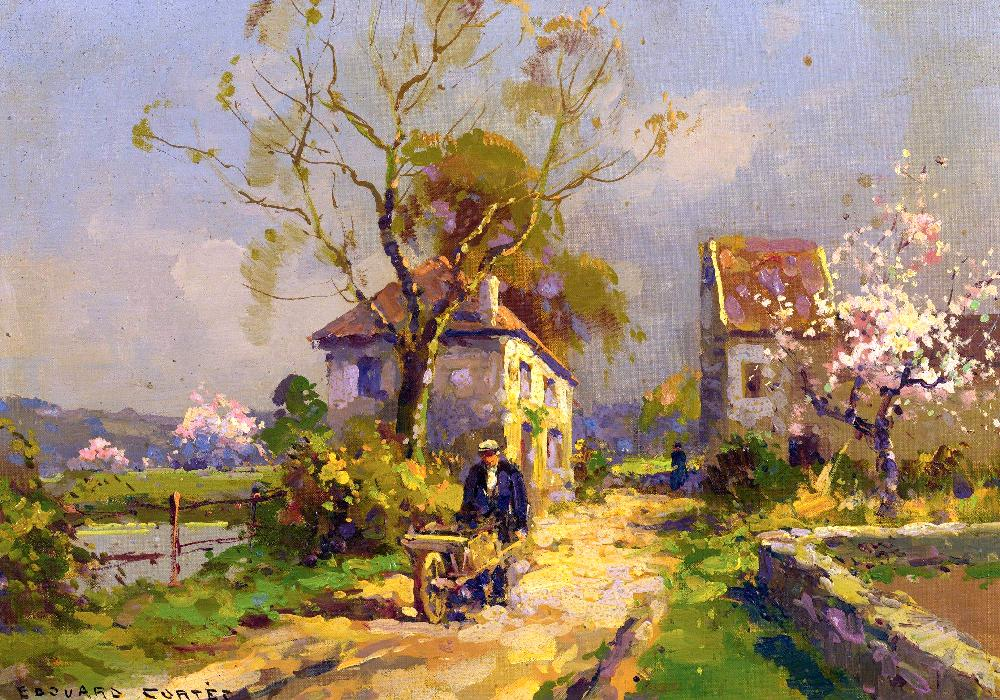

iter=0, loss=1412.574951171875
iter=1, loss=383.560546875
iter=2, loss=214.7424774169922
iter=3, loss=154.40721130371094
duration: 0:00:21.702292


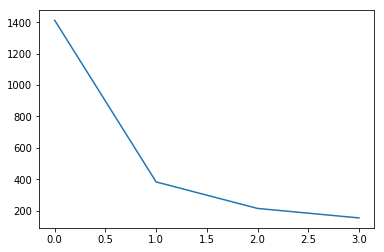

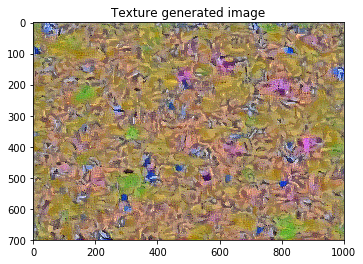

In [8]:
_target_size = (700, 1000)
path_style = 'styles/eva.jpg'  # 'styles/starrynight.jpg'
style_img = load_and_preprocess(path_style,
                                _target_size,
                                "Style image")
batch_shape = style_img.shape

# remember that you can print out the model summary if you want
vgg = VGG16_AvgPool(style_img.shape[1:])

# define output of model
symbolic_conv_outputs = [layer.get_output_at(1) for layer in vgg.layers if layer.name.endswith('conv1')]

# make a big model that outputs multiple layers' outputs
style_model = Model(vgg.input, symbolic_conv_outputs)

# define loss and grads
get_loss_and_grads = style_model_to_grad(style_model,style_img)

# let's optimize
final_img = minimize(get_loss_and_grads_wrapper, 4, batch_shape)

show_img(scale_img(final_img),"Texture generated image")

 ***Let's pick the later layers for a more "globalized" representation***

iter=0, loss=1327.3172607421875
iter=1, loss=325.2043151855469
iter=2, loss=181.11117553710938
iter=3, loss=125.22037506103516
iter=4, loss=94.16609954833984
iter=5, loss=67.95257568359375
iter=6, loss=47.97618865966797
iter=7, loss=34.55376434326172
iter=8, loss=27.52628517150879
iter=9, loss=21.814985275268555
duration: 0:00:46.648653


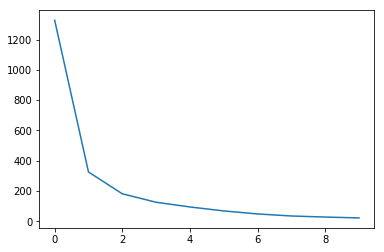

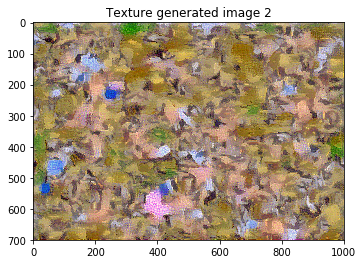

In [9]:
# define output of model
# symbolic_conv_outputs = [layer.get_output_at(1) for layer in vgg.layers if layer.name.endswith('conv1')]
symbolic_conv_outputs1 = symbolic_conv_outputs[1:]

# make a big model that outputs multiple layers' outputs
multi_output_model = Model(vgg.input, symbolic_conv_outputs1)

# define loss and grads
get_loss_and_grads = style_model_to_grad(multi_output_model,style_img)

# let's optimize
final_img = minimize(get_loss_and_grads_wrapper, 10, batch_shape)

show_img(scale_img(final_img),"Texture generated image 2")

## 2.3 - Defining the total cost to optimize
Finally, let's create a cost function that minimizes both the style and the content cost. The formula is: 

$$J(G) = \alpha J_{content}(C,G) + \beta J_{style}(S,G)$$

<img src="images/NST.png" style="width:1000px;height:500px;">
<caption><center> <u> <font color='purple'> **Figure 16** </u><font color='purple'>  : ** Neural Style Transfer** </center></caption>
<img src="images/resultNST.png" style="width:1000px;height:500px;">

**Define total loss**

In [10]:
def NST_model_to_grad(c_model,s_model,c_img,s_img,s_weight):
    
    content_target = K.variable(c_model.predict(c_img))
    # calculate the targets that are output at each layer
    style_layers_outputs = [K.variable(y) for y in s_model.predict(s_img)]
    # calculate the total style loss
    loss = K.mean(K.square(content_model.output - content_target))*3
    for w, symbolic, actual in zip(s_weight, s_model.output, style_layers_outputs):
        loss += w * style_loss(symbolic[0], actual[0])
    
    # gradients which are needed by the optimizer
    grads = K.gradients(loss, vgg.input)
    get_loss_and_grads = K.function(inputs=[vgg.input],outputs=[loss] + grads)
    return get_loss_and_grads


def minimize(fn, epochs, batch_shape, show_noise = False):
    print("batch_shape",batch_shape)
    t0 = datetime.now()
    losses = []
    x = np.random.randn(np.prod(batch_shape))
    if show_noise:
        show_img(x.reshape(batch_shape[1:]),"Random noise image")
    for i in range(epochs):
        x, l, _ = fmin_l_bfgs_b(func=fn,
                                x0=x,
                                maxfun=20)
    
        x = np.clip(x, -127, 127)
        print("iter=%s, loss=%s" % (i, l))
        losses.append(l)

    print("duration:", datetime.now() - t0)
    plt.plot(losses)
    plt.show()
    
    newimg = x.reshape(batch_shape)
    final_img = unpreprocess(newimg)
    return final_img[0]

**Run total loss and generate NST** 

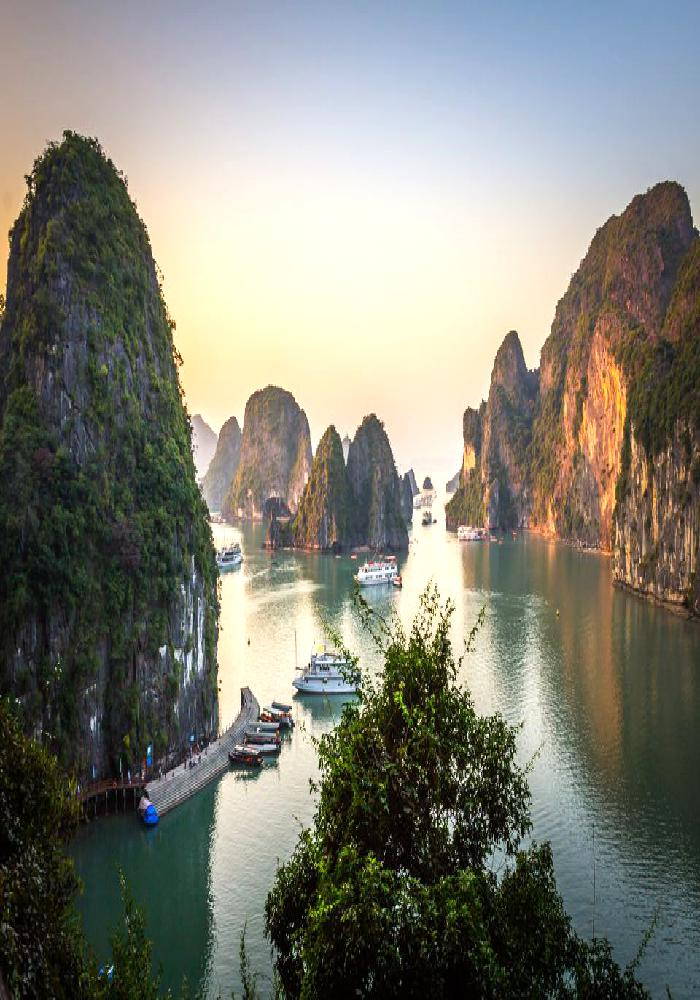

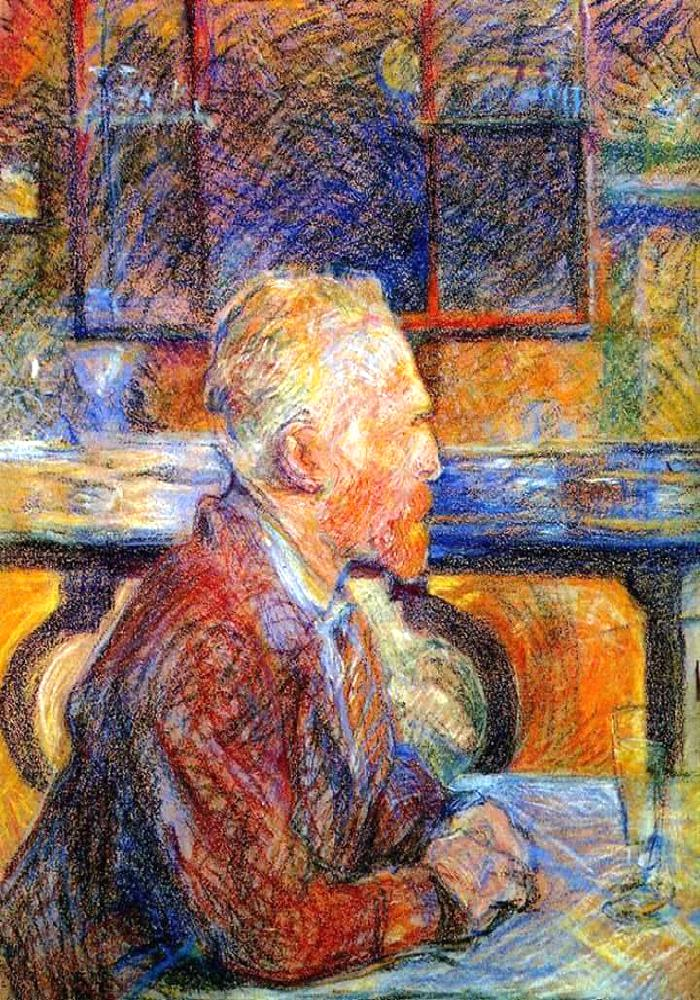

In [11]:
import PIL.Image

_target_size = (1000, 700)
path_content = 'content/halongbay.jpg'  
path_style = 'styles/mauchi.jpg' #'styles/eva.jpg'# 'styles/dwelling.jpg'
content_img = load_and_preprocess(path_content, _target_size,"Content image")
style_img = load_and_preprocess(path_style, _target_size,"Style image")


(1, 1000, 700, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loading...
batch_shape (1, 1000, 700, 3)


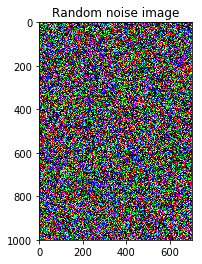

iter=0, loss=1420.485107421875
iter=1, loss=477.9156494140625
iter=2, loss=275.4012145996094
iter=3, loss=197.757568359375
iter=4, loss=160.16030883789062
iter=5, loss=140.4233856201172
iter=6, loss=125.8223648071289
iter=7, loss=115.56542205810547
iter=8, loss=107.87081909179688
iter=9, loss=102.06969451904297
duration: 0:00:54.669448


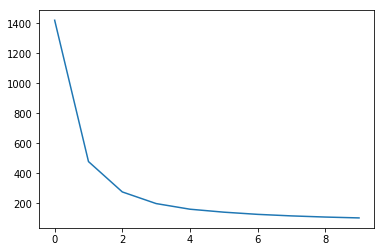

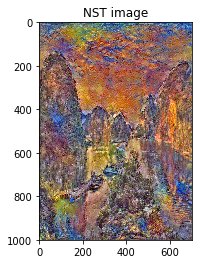

In [12]:
# we'll use this throughout the rest of the script
batch_shape = content_img.shape
print(batch_shape)
shape = content_img.shape[1:]

vgg = VGG16_AvgPool(shape)


# remember you can call vgg.summary() to see a list of layers
# 1,2,4,5,7-9,11-13,15-17. Try it yourself
content_model = Model(vgg.input, vgg.layers[13].get_output_at(0))

# style configure
style_weights = [0.1,0.2,0.5,0.2,0.2]
symbolic_conv_outputs = [layer.get_output_at(1) for layer in vgg.layers if layer.name.endswith('conv1')]
style_model = Model(vgg.input, symbolic_conv_outputs)

get_loss_and_grads = NST_model_to_grad(content_model, style_model,
                                       content_img, style_img,
                                       style_weights)


print("Loading...")

final_img = minimize(get_loss_and_grads_wrapper, 10, batch_shape,True)
show_img(scale_img(final_img),"NST image")

### mauchi.jpg vs halongbay.jpg

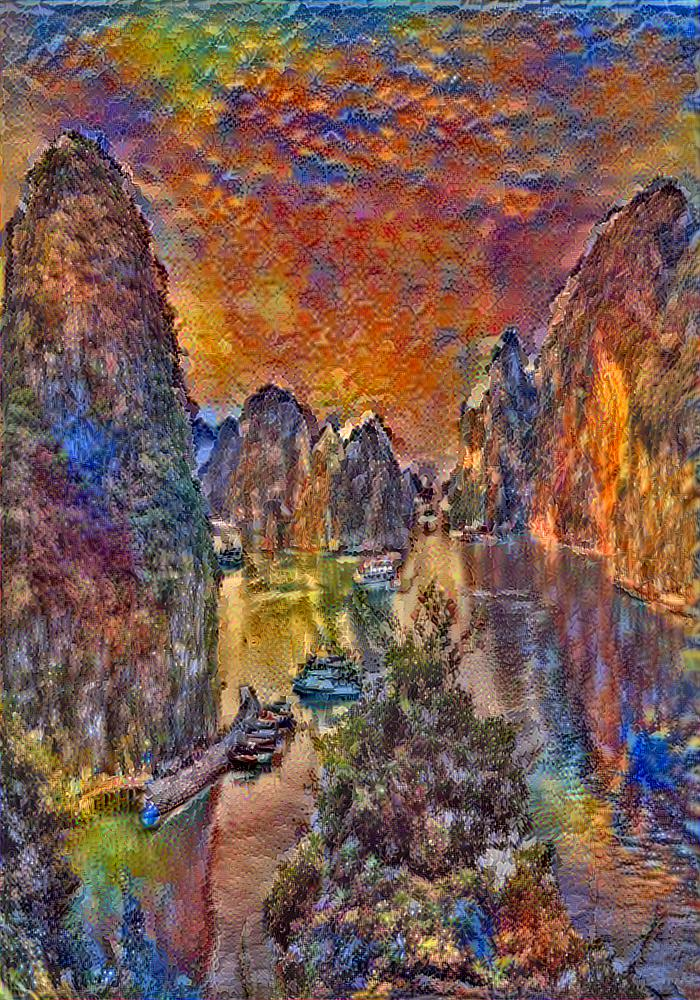

In [13]:
showarray(final_img/255.0)

### mauchi.jpg vs eva.jpg

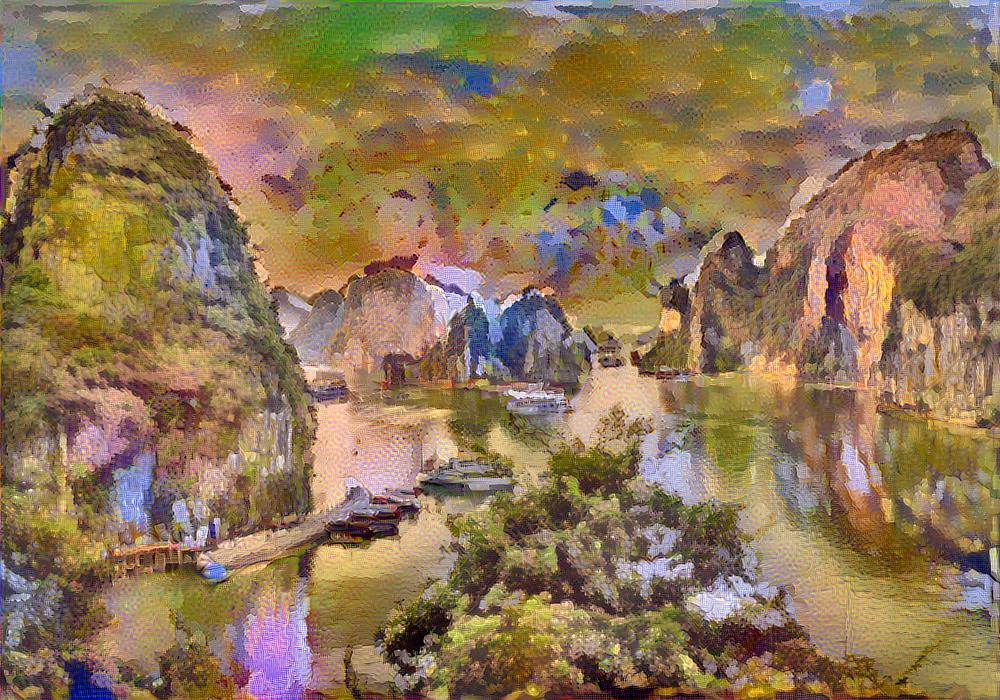

In [6]:
showarray(final_img/255.0)

## Van Gogh style


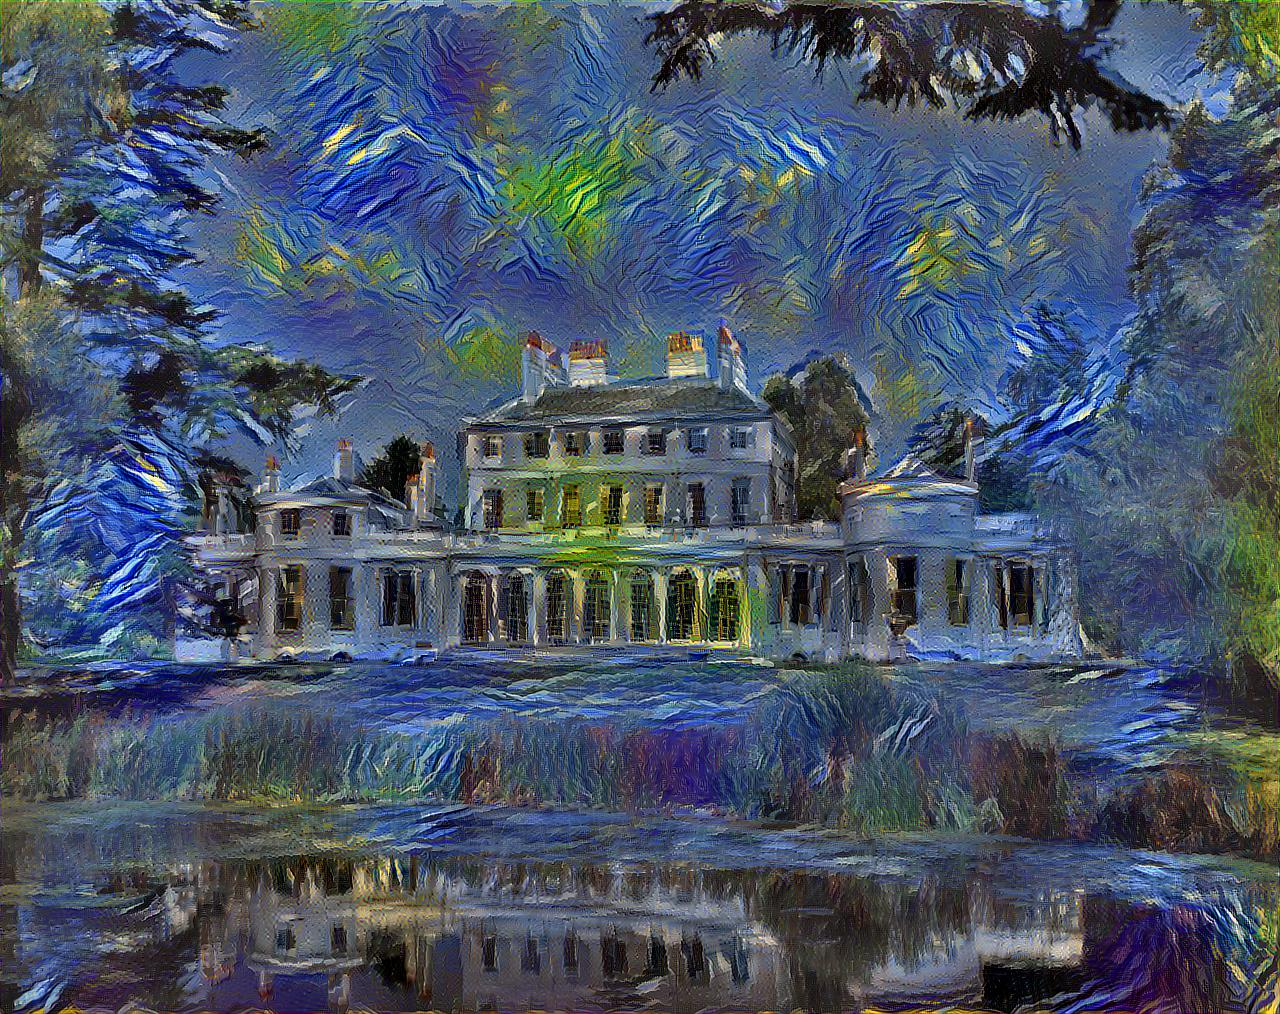

In [8]:
showarray(final_img/255.0)

### Trick: Paste content image in the style background to avoid resizing image

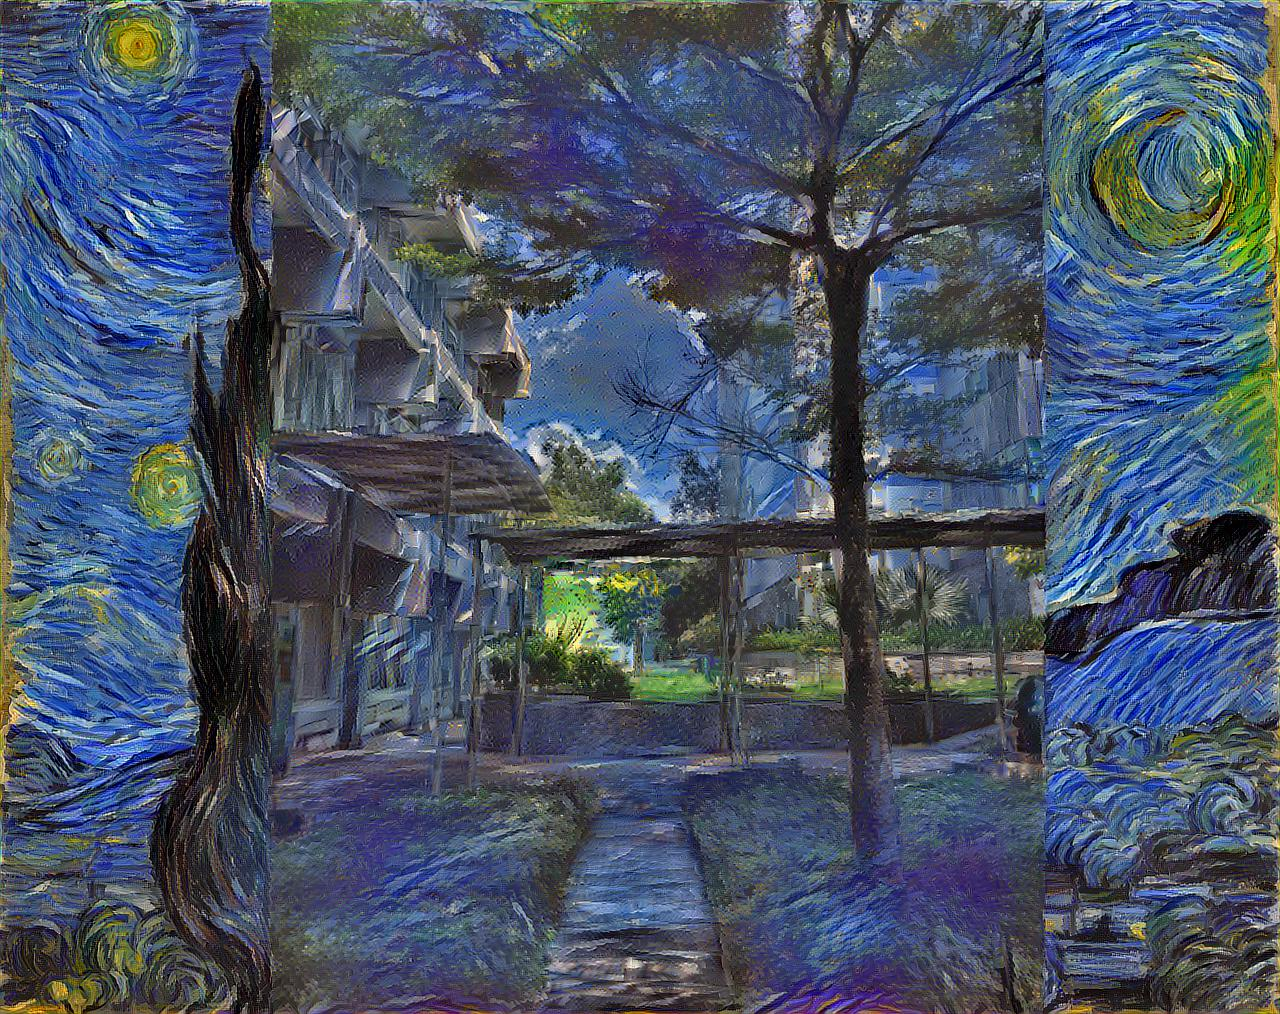

In [12]:
showarray(final_img/255.0)

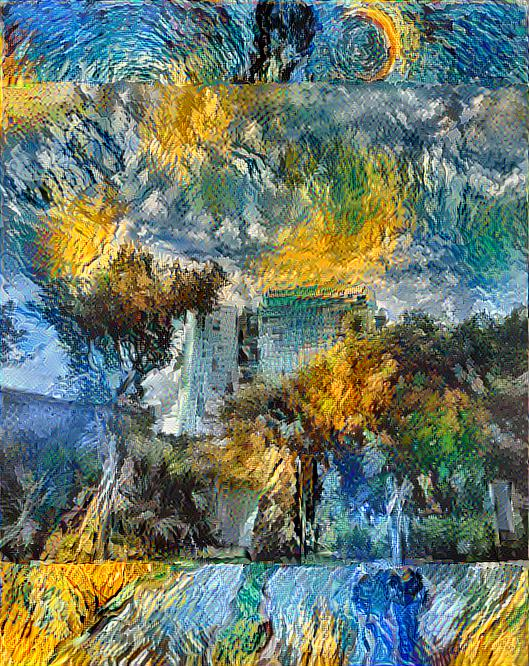

In [4]:
showarray(final_img/255.0)

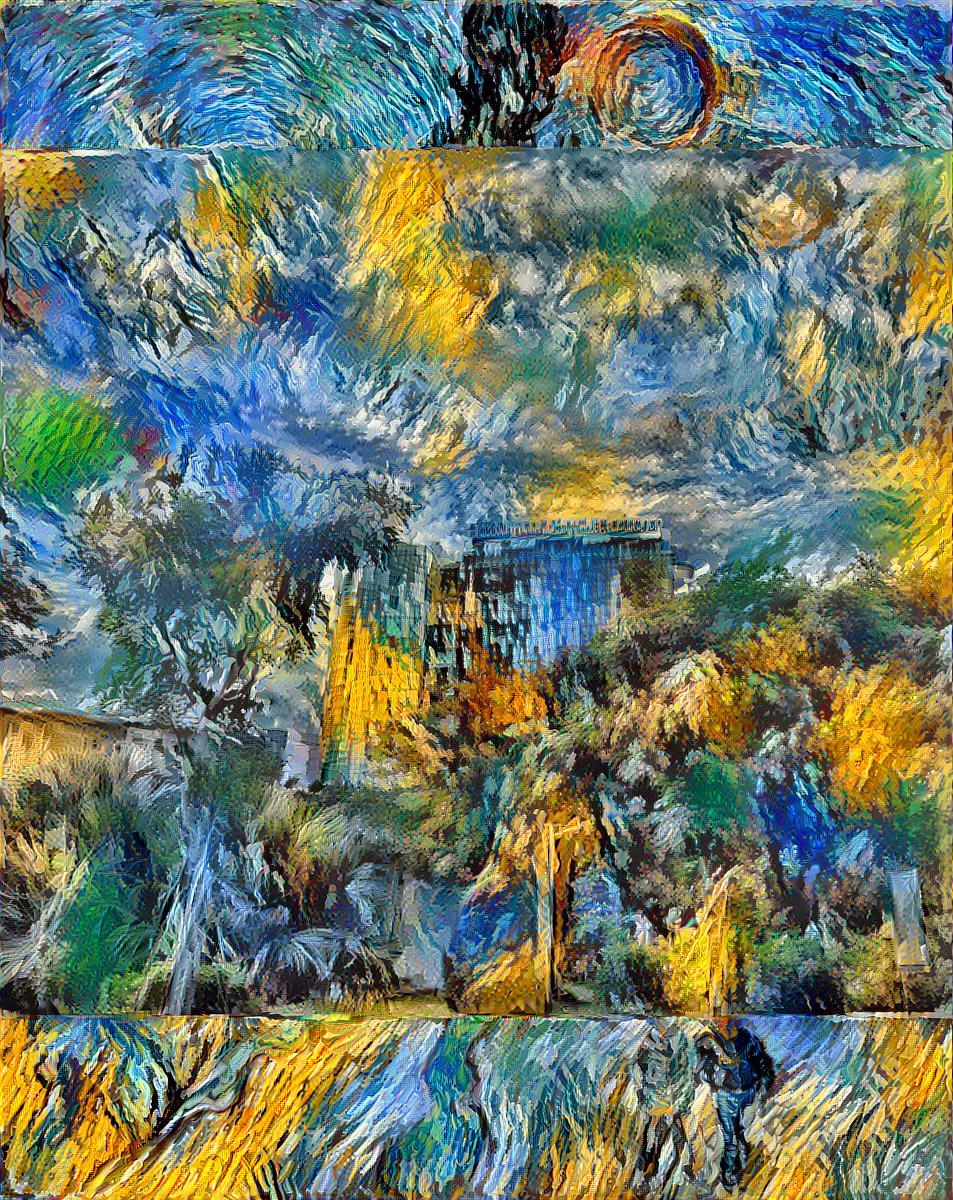

In [7]:
showarray(final_img/255.0)

**Saving final image** 

In [10]:
scipy.misc.toimage(scale_img(final_img)).save('final_image.png')

/home/vietai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


## 2.4 - An overview about NST

*Since the mid-1990s, the art theories behind the fantastic artworks have been attracting the attention of not only the artists but many computer science researchers.*

### A. Non-Photorealistic Rendering
<img src="images/brush-stroke-texture.png" style="width:750px;height:500px;"> 
<caption><center> <u> <font color='purple'> **Figure 17** </u><font color='purple'>  : ** Brush Stroke Texture** </center></caption> <br><br><br>
<img src="images/npr-ori.png" style="width:750px;height:500px;"> 
<caption><center> <u> <font color='purple'> **Figure 18** </u><font color='purple'>  : ** Brush Stroke Orientation** </center></caption> <br><br><br>
<img src="images/npr-transfer.png" style="width:750px;height:500px;"> 
<caption><center> <u> <font color='purple'> **Figure 19** </u><font color='purple'>  : ** Brush Stroke Transfer** </center></caption> <br>

- Limit: these NPR stylisation algorithms are designed for particular artistic styles and cannot be easily extended to other styles.

### B. Neural Style Transform Era
**B.1. Slow NST (Optimization based)** <br> <br>
<img src="images/NST.png" style="width:800px;height:400px;"><br><br><br>
**B.2. Fast NST (Feed-forward based)** <br> <br>
<img src="images/fastNST.png" style="width:800px;height:400px;"> <br><br><br>
**B.3. Ingredients for NST** <br> <br>
***Instance Normalization*** <br> <br>
<img src="images/instancenorm.png" style="width:600px;height:300px;"><br><br><br>
$$
\mathrm { IN } ( x ) = \gamma \left( \frac { x - \mu ( x ) } { \sigma ( x ) } \right) + \beta
$$ 
<br> <br>
<img src="images/instanceex.png" style="width:600px;height:300px;"> <br><br><br>
***Resizing style image*** <br> <br>
<img src="images/resizestyle.png" style="width:900px;height:300px;"><br><br><br>
***Semantic Style Transfer***  <br> <br>

<img src="images/semantic.png" style="width:800px;height:400px;"><br><br><br>
**B.4. Limitation:** <br>
* Tree-way trade-off: speed, flexibility and quality
* Interpretable Neural Style Transfer
* Evaluation methodology

<p align="center">
  <b>Reference materials:</b><br>
  <a href="http://cs231n.stanford.edu/slides/2018/cs231n_2018_lecture13.pdf">1. Stanford CS231n - Visualizing and understanding CNN </a><br>
  <a href="https://arxiv.org/abs/1705.04058"> 2. Yongcheng Jing et al.(2018) - Neural Style Transfer: A Review</a><br>
  <a href="https://www.cl.cam.ac.uk/teaching/1011/RSL/Richardt.pdf"> 3. Christian Richardt, Rainbow Group - Non-Photorealistic Rendering (NPR)</a><br>
  <a href="https://www.coursera.org/learn/convolutional-neural-networks/home/welcome">4. Deeplearning.ai Course 4</a> <br>
  <a href="https://www.udemy.com/advanced-computer-vision">5. Udemy Advanced Computer Vision</a> 
  <br><br>
</p>
